In [1]:
#Step 1
!pip install pmdarima

In [2]:
#Step 2
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
#Step 3
dateparse = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')

In [4]:
Reliance = pd.read_excel(r"D:/Reliance_Industries.xlsx",index_col = 'Date',parse_dates = True)

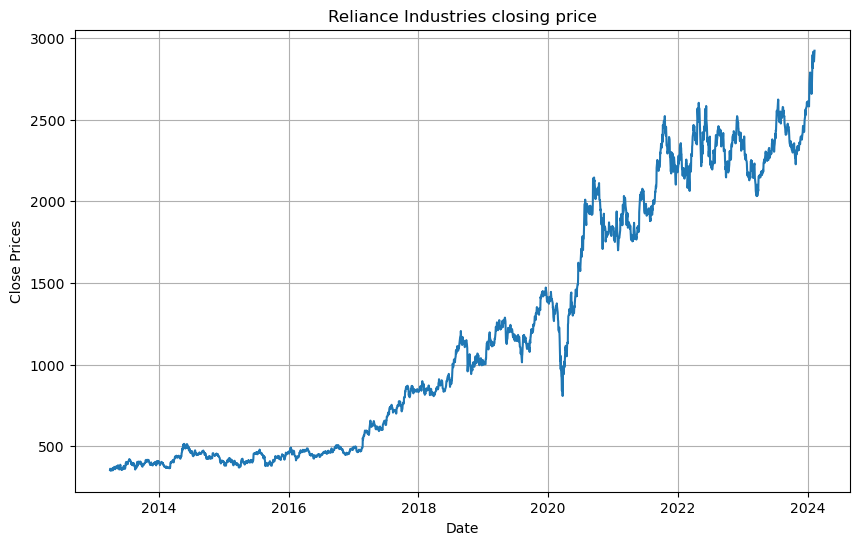

In [5]:
#Step4
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(Reliance['Close'])
plt.title('Reliance Industries closing price')
plt.show()

<Axes: ylabel='Density'>

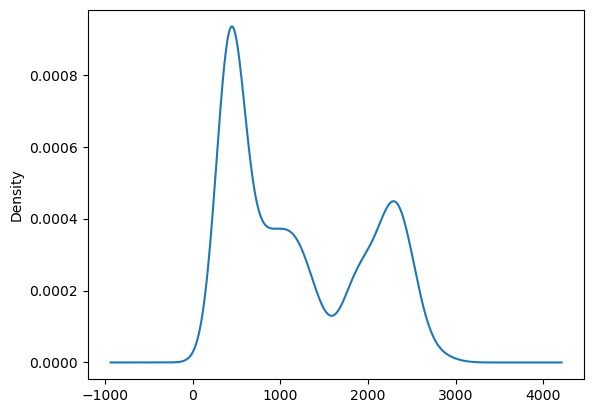

In [6]:
#Step 5
df_close = Reliance['Close']
df_close.plot(kind ='kde')

In [7]:
#Step 5
missing_values = df_close.isnull().sum()
print(missing_values)

2


In [8]:
#Step 6 Finding Infinite Values
infinite_values = df_close[df_close==np.inf].count()
print(infinite_values)

0


In [9]:
#Step 7
df_close = df_close.fillna(df_close.mean())

In [10]:
#Step 8
df_close = df_close.dropna()

Interpretation
The increasing mean and standard deviation may be seen in the graph above,indicating that our series isnt stationary
The p value is bigger than 0.05.
Additionally the test statisicd exceed critical values
Hence the data is non linear

Step-9 ADF Assumptions
•⁠  ⁠Null Hypothesis (HO): Series is non-stationary, or series has a unit root.
•⁠  ⁠Alternate Hypothesis(HA): Series is stationary, or series has no unit root.
#If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.
If Test statistic < Critical Value and p-value < 0.05 - Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [26]:
#Step10 Test for stationary
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries,color ='blue',label='Original')
    plt.plot(rolmean,color ='red',label='Rolling Mean')
    plt.plot(rolstd,color ='black',label='Rolling Std')
    plt.legend(loc=best)
    plt.show(block=False)
print('Results of dickey fuller test')
adft = adfuller(timeseries,autolag= 'AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value', 'No. of lags used', 'Number of observations used'])
for key, values in adft[4].items():
    output['Critical value (%s)'%key] = values
    print(output)

test_stationarity(df_close)



Results of dickey fuller test


NameError: name 'timeseries' is not defined